In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/hypertension_dataset 2.csv")

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")
print("Columns present:", df.columns.tolist())

Columns present: ['age', 'salt_intake', 'stress_score', 'bp_history', 'sleep_duration', 'bmi', 'medication', 'family_history', 'exercise_level', 'smoking_status', 'has_hypertension']


In [ ]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df['medication'].fillna(df['medication'].mode()[0], inplace=True)

print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 age                 0
salt_intake         0
stress_score        0
bp_history          0
sleep_duration      0
bmi                 0
medication          0
family_history      0
exercise_level      0
smoking_status      0
has_hypertension    0
dtype: int64


/tmp/ipython-input-3849767895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['medication'].fillna(df['medication'].mode()[0], inplace=True)


In [ ]:
categorical_cols = [
    "salt_intake", "bp_history", "medication",
    "family_history", "exercise_level", "smoking_status"
]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
features = [
    "age", "salt_intake", "stress_score", "bp_history", "sleep_duration",
    "bmi", "medication", "family_history", "exercise_level", "smoking_status"
]
X = df[features]
y = df["has_hypertension"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

df["cluster"] = clusters
cross_tab = pd.crosstab(df["cluster"], y)
print("\nCluster vs Hypertension:\n", cross_tab)

Silhouette Score: 0.07597714537535347

Cluster vs Hypertension:
 has_hypertension   No  Yes
cluster                   
0                 581  404
1                 372  628


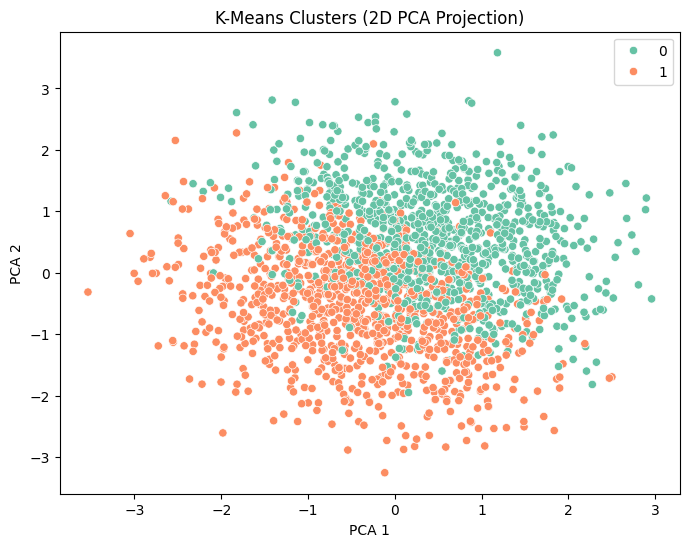

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2")
plt.title("K-Means Clusters (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()